# Autofig Size Modes

In [1]:
import autofig
import numpy as np
import matplotlib.pyplot as plt

In [2]:
autofig.inline()

In [32]:
x = np.linspace(0,0.1,11)
y = np.full_like(x, 0)

## s as float vs array

In [40]:
style = {'marker': 'o', 'linestyle': 'none', 'xpad': 0}

When setting the size (via the 's' dimension) as a float, that value is used directly according to the size-mode.

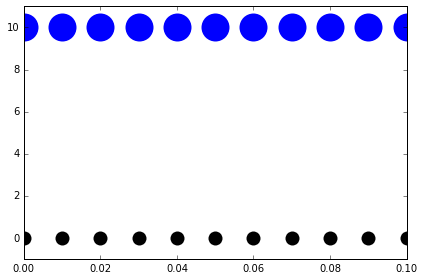

In [41]:
autofig.reset()
autofig.plot(x, y, s=0.05, **style)
autofig.plot(x, y+10, s=0.1, **style)
autofig.draw(show=True)

However, when sending an array (or list), the values are mapped according to smap *before* being scaled according to the size-mode.

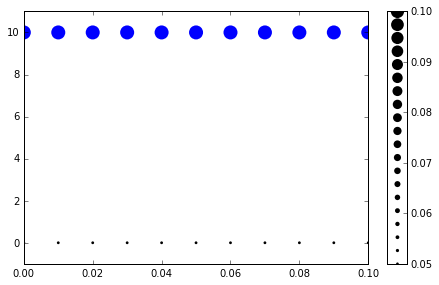

In [42]:
autofig.reset()
autofig.plot(x, y, s=np.full_like(x, 0.05), **style)
autofig.plot(x, y+10, s=np.full_like(x, 0.1), **style)
autofig.draw(show=True)

Here even though we're sending the same 0.05 and 0.1 as above, are rescaled according to the default smap of 0.01 to 0.05.

In [50]:
autofig.gcf().axes.ss[0].smap

(0.01, 0.05)

This smap scaling can of course be changed by manually sending a tuple.

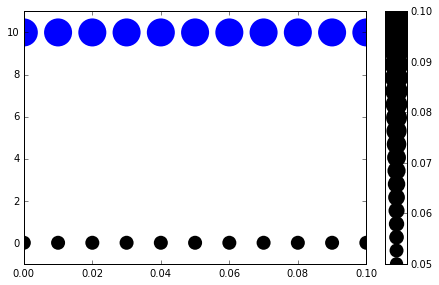

In [51]:
autofig.reset()
autofig.plot(x, y, s=np.full_like(x, 0.05), smap=(0.05,0.1), **style)
autofig.plot(x, y+10, s=np.full_like(x, 0.1), smap=(0.05,0.1), **style)
autofig.draw(show=True)

## smode

The values in the 's' dimension (after mapping, if applicable) are then rescaled onto matplotlib's pixel scale based on the provided value of 'smode'.  There are a number of accepted values for smode:

* 'pt' - the mapped value is passed directly to matplotlib and will have the same size on the screen regardless of zoom/figuresize
* [dimension(s)]:[figure/axes]:fixed - the mapped value is rescaled according to the size of the figure or axes in the given dimension/dimensions, but then remains fixed regardless of the zoom/figuresize
* [dimension(s)]:[figure/axes]:current - the mapped value is rescaled according to the size of the figure or axes and is updated when zooming or resizing the figure based on the *current* axes limits.  This means when zooming in an interactive matplotlib window, the points will keep a fixed size on the screen but when resizing the figure, the points will react.
* [dimension(s)]:[figure/axes]:original - the mapped value is rescaled according to the size of the figure or axes and is updated when zooming or resizing the figure based on the *original* axes limits.  This means when zooming in an interactive matplotlib window, the points will keep a fixed size *in data unit* and will therefore appear larger when zooming in.

Where dimension(s) can be one of:
* 'x'
* 'y'
* 'xy'

By default, smode is 'xy:axes:fixed'

In [22]:
style1 = {'marker': 'o', 'linestyle': 'solid', 'xpad': 0}

Here we'll plot s=0.1 for several different size modes

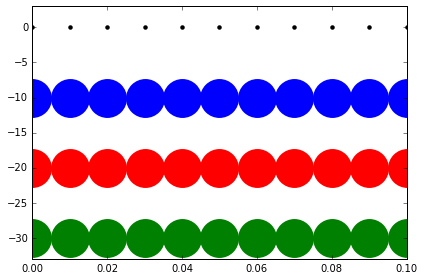

In [52]:
autofig.reset()
autofig.plot(x, y, s=5, smode='pt', color='black', **style) 
autofig.plot(x, y-10, s=0.1, smode='x:figure:fixed', color='blue', **style)
autofig.plot(x, y-20, s=0.1, smode='x:figure:current', color='red', **style)
autofig.plot(x, y-30, s=0.1, smode='x:figure:original', color='green', **style)
autofig.draw(show=True)

Besides 'pt', there is no obvious difference between 'fixed', 'current', and 'original' until resizing the figure interactively.  Here we can fake zooming in on the plot by setting the x-limits externally (in matplotlib instead of autofig).

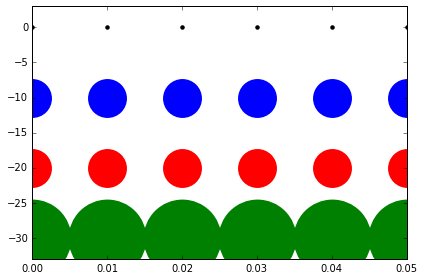

In [53]:
plt.xlim(0,0.05)
plt.show()